In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kaggle_titanic_helpers import *
import missingno as msmn

In [3]:
## Updated Features

#  HomePlanet      201 - Updated logic and function below, but still filling 30% with mode
#  CryoSleep       217 - Updated logic and function below
#  Cabin           199
#  Destination     182
#  Age             179
#  VIP             203
#  RoomService     181 - Fill with zero
#  FoodCourt       183 - Fill with zero
#  ShoppingMall    208 - Fill with zero
#  Spa             183 - Fill with zero
#  VRDeck          188 - Fill with zero
#  Name            200

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

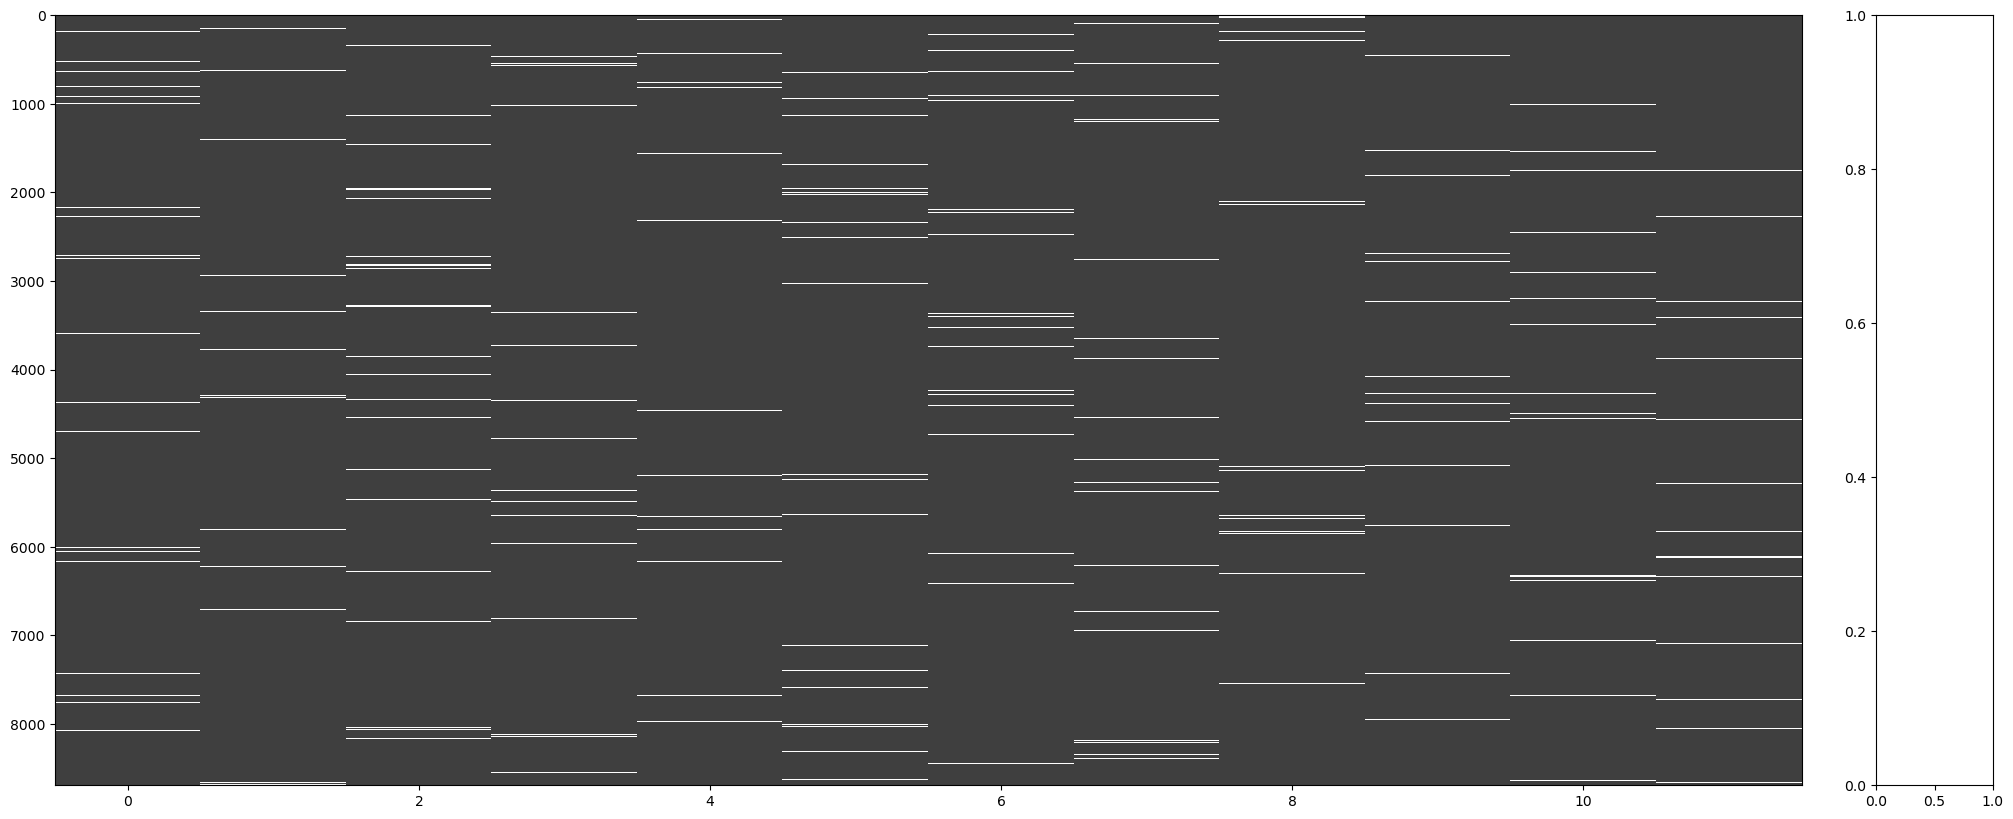

In [9]:
msmn.matrix(train.drop(['PassengerId','Transported'],axis=1))

In [10]:
# These people are not in the same cabin, but in same passenger group
# Need to look at capacity of cabin sizes
def check_pass_group(group_num):
    return train[train['PassengerId'].apply(lambda x: str(x[:4]))==group_num]

check_pass_group('0138')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
127,0138_01,Earth,True,G/18/P,TRAPPIST-1e,13.0,False,0.0,0.0,0.0,0.0,0.0,Fayene Gambs,True
128,0138_02,Earth,False,E/5/P,NaN,34.0,False,0.0,22.0,0.0,564.0,207.0,Monah Gambs,False


In [11]:
train[train['Destination'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
47,0045_02,Mars,True,F/10/P,NaN,19.0,False,0.0,0.0,0.0,0.0,0.0,Mass Chmad,True
128,0138_02,Earth,False,E/5/P,NaN,34.0,False,0.0,22.0,0.0,564.0,207.0,Monah Gambs,False
139,0152_01,Earth,False,F/32/P,NaN,41.0,False,0.0,0.0,0.0,0.0,607.0,Andan Estron,False
347,0382_01,NaN,False,G/64/P,NaN,23.0,False,348.0,0.0,0.0,4.0,368.0,Blanie Floydendley,False
430,0462_01,Earth,True,G/67/S,NaN,50.0,False,0.0,0.0,0.0,0.0,0.0,Ronia Sosanturney,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,8956_02,Earth,True,G/1453/P,NaN,20.0,False,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,True
8551,9130_01,Mars,True,F/1765/S,NaN,41.0,False,0.0,0.0,0.0,0.0,0.0,Blers Corte,True
8616,9195_02,Mars,True,F/1779/S,NaN,33.0,False,0.0,0.0,0.0,0.0,0.0,Ceros Purle,True
8621,9197_02,Europa,False,C/308/P,NaN,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False


In [12]:
train.Destination.nunique()

3

In [13]:
# Initiating some used variables/features

# Getting spend cols
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# PassengerId follows XXXX_XX structure for all
train['passenger_group'] = train['PassengerId'].apply(lambda x: str(x[:4]))
train['num_group'] = train['PassengerId'].apply(lambda x: x[-2:])


# No spend cols are null across the board, so will fill NANs with zero and sum totals
# train[train[spend_cols].isnull().values.all(axis=1)]
train[spend_cols] = train[spend_cols].fillna(0)

# Adding total spend column
train['total_spend'] = train[spend_cols].sum(axis=1)

# Adding max number of passengers in group and total spend
train = train.join(train.groupby('passenger_group')\
                   .agg({'total_spend':'sum','num_group':'max'}),on='passenger_group',rsuffix='_max')

train['num_group_max'] = train['num_group_max'].astype('int')


In [14]:
# Checking Null Values
train.isna().sum(), train.dropna().count()

(PassengerId          0
 HomePlanet         201
 CryoSleep          217
 Cabin              199
 Destination        182
 Age                179
 VIP                203
 RoomService          0
 FoodCourt            0
 ShoppingMall         0
 Spa                  0
 VRDeck               0
 Name               200
 Transported          0
 passenger_group      0
 num_group            0
 total_spend          0
 total_spend_max      0
 num_group_max        0
 dtype: int64,
 PassengerId        7398
 HomePlanet         7398
 CryoSleep          7398
 Cabin              7398
 Destination        7398
 Age                7398
 VIP                7398
 RoomService        7398
 FoodCourt          7398
 ShoppingMall       7398
 Spa                7398
 VRDeck             7398
 Name               7398
 Transported        7398
 passenger_group    7398
 num_group          7398
 total_spend        7398
 total_spend_max    7398
 num_group_max      7398
 dtype: int64)

In [15]:
## Most records with missing values do not belong to a similar passenger group
pass_group = train.drop(train.dropna()[['PassengerId']].index).groupby('passenger_group')['PassengerId'].count().index

pass_count = train.drop(train.dropna()[['PassengerId']].index).groupby('passenger_group')['PassengerId'].count().values


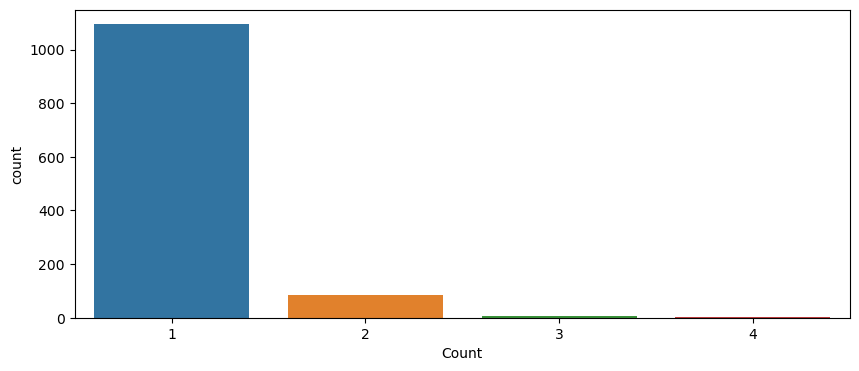

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(data=pd.DataFrame(pass_count,pass_group,columns=['Count']),x='Count')

plt.show()

### Fixing surnames

In [17]:
# Missing names don't follow a pattern
train[~train['Name'].notna()].describe().T, train[train['Name'].notna()].describe().T

(                 count         mean          std  min     25%     50%  \
 Age              197.0    28.050761    15.548721  0.0   18.00    26.0   
 RoomService      200.0   247.565000   695.084157  0.0    0.00     0.0   
 FoodCourt        200.0   450.755000  1483.502092  0.0    0.00     0.0   
 ShoppingMall     200.0   247.330000  1683.583347  0.0    0.00     0.0   
 Spa              200.0   282.735000   818.164347  0.0    0.00     0.0   
 VRDeck           200.0   416.555000  1975.875153  0.0    0.00     0.0   
 total_spend      200.0  1644.940000  3498.931755  0.0    0.00   741.0   
 total_spend_max  200.0  3330.795000  6100.464389  0.0  389.25  1020.0   
 num_group_max    200.0     2.140000     1.662595  1.0    1.00     1.0   
 
                      75%      max  
 Age                37.00     70.0  
 RoomService       105.00   6498.0  
 FoodCourt          28.75  12045.0  
 ShoppingMall       36.75  23492.0  
 Spa                46.00   6841.0  
 VRDeck             21.25  24133.0  

In [18]:
train['surname'] = train[train['Name'].notna()].Name.apply(lambda x: str(x).split(" ")[-1])

In [19]:
train[train['num_group_max']>1]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passenger_group,num_group,total_spend,total_spend_max,num_group_max,surname
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,10383.0,15559.0,2,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,5176.0,15559.0,2,Susent
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,01,1584.0,1584.0,2,Jacostaffey
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,0006,02,0.0,1584.0,2,Jacostaffey
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,01,0.0,8157.0,3,Flatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True,9275,01,0.0,4771.0,3,Conable
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False,9275,02,1231.0,4771.0,3,Conable
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True,9275,03,3540.0,4771.0,3,Conable
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,4637.0,9463.0,2,Hontichre


In [20]:
# About even number of passengers with 1 or passengers with multiple people in group
train[(~train['Name'].notna())&(train['num_group_max']>1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passenger_group,num_group,total_spend,total_spend_max,num_group_max,surname
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,0064,01,0.0,0.0,2,NaN
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,0082,03,0.0,7406.0,3,NaN
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False,0108,02,888.0,888.0,3,NaN
297,0330_02,Europa,False,C/14/S,TRAPPIST-1e,32.0,False,247.0,4651.0,0.0,46.0,202.0,NaN,True,0330,02,5146.0,7314.0,3,NaN
305,0337_03,Mars,False,F/63/S,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,0337,03,0.0,2460.0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,9081_04,Earth,False,G/1476/P,TRAPPIST-1e,9.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,9081,04,0.0,3118.0,8,NaN
8516,9085_01,Europa,False,A/95/P,55 Cancri e,70.0,False,0.0,2113.0,0.0,1972.0,51.0,NaN,False,9085,01,4136.0,8755.0,3,NaN
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,9194,01,7177.0,9104.0,2,NaN
8629,9205_02,Europa,True,B/300/P,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,9205,02,0.0,0.0,3,NaN


### CryoSleep Engineering
#### Should come after we decide on spend columns?

In [21]:
# For non-missing values, anyone in CryoSleep does not have spend; Will Set CryoSleep based on spend
train.dropna().loc[train['CryoSleep']==True][spend_cols].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

In [22]:
train.isna().sum()

PassengerId          0
HomePlanet         201
CryoSleep          217
Cabin              199
Destination        182
Age                179
VIP                203
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Name               200
Transported          0
passenger_group      0
num_group            0
total_spend          0
total_spend_max      0
num_group_max        0
surname            200
dtype: int64

In [23]:
train.isna()['CryoSleep'].sum()

217

In [24]:
def fill_cryosleep(df):
    
    num_nulls = df.isna()['CryoSleep'].sum()
    print(f'{num_nulls} Initially')
    
    # Anyone spending money isn't in CryoSleep
    df.loc[(df['CryoSleep'].isna())&(df['total_spend']>0),['CryoSleep']] = 0
    num_nulls = df.isna()['CryoSleep'].sum()
    print(f'{num_nulls} After Step 1: Spending Money = No CryoSleep')
    
    # Zero spend for only passenger in group
    df.loc[(train['CryoSleep'].isna())&(df['num_group_max']==1)&(df['total_spend']==0),['CryoSleep']] = 1
    num_nulls = df.isna()['CryoSleep'].sum()
    print(f'{num_nulls} After Step 2: 1 Passenger / Zero Spend = CryoSleep')
    
    # Groups with zero total spend
    df.loc[(train['CryoSleep'].isna())&(df['total_spend_max']==0),['CryoSleep']] = 1
    num_nulls = df.isna()['CryoSleep'].sum()
    print(f'{num_nulls} After Step 3: Total Group Spend Zero = CryoSleep')
    
    # Groups with total spend >0
    df.loc[(train['CryoSleep'].isna())&(df['total_spend_max']>0),['CryoSleep']] = 0
    num_nulls = df.isna()['CryoSleep'].sum()
    print(f'{num_nulls} After Step 4: Total Group Spend > Zero = No CryoSleep')
    
    return df

In [25]:
train = fill_cryosleep(train)

217 Initially
98 After Step 1: Spending Money = No CryoSleep
61 After Step 2: 1 Passenger / Zero Spend = CryoSleep
43 After Step 3: Total Group Spend Zero = CryoSleep
0 After Step 4: Total Group Spend > Zero = No CryoSleep


In [56]:
# Interesting passenger group that "bucks the trend" of transported when in Cryo - 2384
check_pass_group('2384')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passenger_group,num_group,total_spend,total_spend_max,num_group_max,surname
2221,2384_01,Earth,True,G/383/S,TRAPPIST-1e,57.0,False,0.0,0.0,0.0,0.0,0.0,Paulah Cleachrand,False,2384,01,0.0,0.0,7,Cleachrand
2222,2384_02,Earth,True,G/383/S,PSO J318.5-22,3.0,False,0.0,0.0,0.0,0.0,0.0,Landa Cleachrand,False,2384,02,0.0,0.0,7,Cleachrand
2223,2384_03,Earth,False,G/383/S,55 Cancri e,11.0,False,0.0,0.0,0.0,0.0,0.0,Cathya Pollarkeeks,True,2384,03,0.0,0.0,7,Pollarkeeks
2224,2384_04,Earth,False,G/383/S,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,Loreen Cleachrand,True,2384,04,0.0,0.0,7,Cleachrand
2225,2384_05,Earth,True,G/383/S,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Ronia Pollarkeeks,False,2384,05,0.0,0.0,7,Pollarkeeks
2226,2384_06,Earth,1,G/383/S,TRAPPIST-1e,30.0,False,0.0,0.0,0.0,0.0,0.0,Lerome Cleachrand,False,2384,06,0.0,0.0,7,Cleachrand
2227,2384_07,NaN,True,NaN,TRAPPIST-1e,11.0,False,0.0,0.0,0.0,0.0,0.0,Neila Pollarkeeks,True,2384,07,0.0,0.0,7,Pollarkeeks


In [26]:
remaining_passenger_groups = train.loc[(train['CryoSleep'].isna())&(train['total_spend_max']==0)][['passenger_group']]
remaining_passenger_groups['passenger_group'].values


array([], dtype=object)

In [27]:
train[train['passenger_group'].isin(remaining_passenger_groups['passenger_group'].values)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passenger_group,num_group,total_spend,total_spend_max,num_group_max,surname


In [28]:
# All missing Cryosleep Passengers with total_spend_max = 0 have all people in group in CryoSleep
train[train['passenger_group'].isin(remaining_passenger_groups['passenger_group'].values)]\
                        .groupby('passenger_group')['CryoSleep'].count().values/(train[train['passenger_group'].isin(remaining_passenger_groups['passenger_group'].values)]\
                        .groupby('passenger_group')['PassengerId'].count().values-1)

array([], dtype=float64)

In [30]:
# All missing Cryosleep Passengers with total_spend_max > 0 have all people in group not in CryoSleep
remaining_passenger_groups = train.loc[(train['CryoSleep'].isna())&(train['total_spend_max']>0)][['passenger_group']]
# All missing Cryosleep Passengers with total_spend_max = 0 have all people in group in CryoSleep
train[train['passenger_group'].isin(remaining_passenger_groups['passenger_group'].values)]\
                        .groupby('passenger_group')['CryoSleep'].count().values/(train[train['passenger_group'].isin(remaining_passenger_groups['passenger_group'].values)]\
                        .groupby('passenger_group')['PassengerId'].count().values-1)

array([], dtype=float64)

### Home Planet

In [90]:
# Starting over with premade functions
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [34]:
def basic_prep(df):
    df[['deck', 'number', 'side']] = pd.DataFrame(
        df.Cabin.apply(lambda x: str(x).split('/')).tolist(),
        index= df.index,
        columns=['deck', 'number', 'side'],
    )
    # PassengerId follows XXXX_XX structure for all
    df['passenger_group'] = df['PassengerId'].apply(lambda x: str(x[:4]))
    df['num_group'] = df['PassengerId'].apply(lambda x: x[-2:])
    
    df['total_spend'] = df[spend_cols].sum(axis=1)
    df = df.join(df.groupby('passenger_group')\
                   .agg({'total_spend':'sum','num_group':'max'}),on='passenger_group',rsuffix='_max')
    df['num_group_max'] = df['num_group_max'].astype('int')
    
    df['surname'] = df[df['Name'].notna()].Name.apply(lambda x: str(x).split(" ")[-1])
    
    df.replace({'nan':np.nan},inplace=True) # Needed, since split above creates "nan"
    df.number = df.number.astype(float)


    # Setting up error handling as test_df doesn't have "Transported"
    try:
        df["Transported"] = df["Transported"].replace({True: 1, False: 0})
    except:
        pass
    return df

def fill_missing_basic(df, float_cols, object_cols):
    df[spend_cols] = df[spend_cols].fillna(df[spend_cols].mean())
    df[float_cols] = df[float_cols].fillna(df[float_cols].mean().to_dict())
    object_dict = {k:v[0] for k, v in df[object_cols].mode().to_dict().items()}
    df[object_cols] = df[object_cols].fillna(object_dict)
    return df

In [35]:
train_df = basic_prep(train)
test_df = basic_prep(test)

In [140]:
# All passengers in the same group start from the same planet
train.loc[~train['HomePlanet'].isna()].groupby(['passenger_group','HomePlanet']).count()\
                    .to_csv('checking_homeplanet.csv')


In [141]:
# Each dataset uses different passenger groups
train_df.groupby('passenger_group').count()['PassengerId'].to_csv('train_passenger_groups.csv')
test_df.groupby('passenger_group').count()['PassengerId'].to_csv('test_passenger_groups.csv')

In [142]:
home_planet = train.loc[~train['HomePlanet'].isna()][['passenger_group','HomePlanet']]

home_planet.set_index('passenger_group').to_dict()['HomePlanet']

{'0001': 'Europa',
 '0002': 'Earth',
 '0003': 'Europa',
 '0004': 'Earth',
 '0005': 'Earth',
 '0006': 'Earth',
 '0007': 'Earth',
 '0008': 'Europa',
 '0009': 'Mars',
 '0010': 'Earth',
 '0011': 'Earth',
 '0012': 'Earth',
 '0014': 'Mars',
 '0015': 'Earth',
 '0016': 'Mars',
 '0017': 'Earth',
 '0020': 'Earth',
 '0022': 'Mars',
 '0024': 'Europa',
 '0025': 'Earth',
 '0026': 'Europa',
 '0028': 'Mars',
 '0030': 'Earth',
 '0031': 'Mars',
 '0034': 'Europa',
 '0035': 'Mars',
 '0036': 'Earth',
 '0038': 'Earth',
 '0039': 'Earth',
 '0041': 'Earth',
 '0043': 'Europa',
 '0044': 'Earth',
 '0045': 'Mars',
 '0050': 'Earth',
 '0051': 'Earth',
 '0052': 'Earth',
 '0053': 'Earth',
 '0056': 'Europa',
 '0058': 'Earth',
 '0061': 'Earth',
 '0062': 'Earth',
 '0064': 'Mars',
 '0066': 'Earth',
 '0067': 'Earth',
 '0068': 'Mars',
 '0069': 'Earth',
 '0070': 'Earth',
 '0071': 'Earth',
 '0072': 'Earth',
 '0073': 'Mars',
 '0074': 'Europa',
 '0076': 'Mars',
 '0077': 'Mars',
 '0078': 'Europa',
 '0081': 'Earth',
 '0082': 'Mar

In [143]:
train.loc[train['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,number,side,passenger_group,num_group,total_spend
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True,D,6,P,0210,01,0.0
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,F,46,S,0242,01,1288.0
274,0303_01,NaN,True,G/41/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Oraryn Kirklander,True,G,41,S,0303,01,0.0
286,0315_01,NaN,True,G/42/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Adriet Valezaley,True,G,42,S,0315,01,0.0
291,0321_01,NaN,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,Quites Bache,False,F,61,S,0321,01,1227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468,9043_01,NaN,True,F/1848/P,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,Cobix Erle,True,F,1848,P,9043,01,0.0
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,E,582,P,9084,01,1299.0
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,F,1792,S,9248,01,2416.0
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,F,1892,P,9257,01,1148.0


In [144]:
train.loc[train['HomePlanet'].isna()] 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,number,side,passenger_group,num_group,total_spend
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True,D,6,P,0210,01,0.0
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,F,46,S,0242,01,1288.0
274,0303_01,NaN,True,G/41/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Oraryn Kirklander,True,G,41,S,0303,01,0.0
286,0315_01,NaN,True,G/42/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Adriet Valezaley,True,G,42,S,0315,01,0.0
291,0321_01,NaN,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,Quites Bache,False,F,61,S,0321,01,1227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468,9043_01,NaN,True,F/1848/P,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,Cobix Erle,True,F,1848,P,9043,01,0.0
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,E,582,P,9084,01,1299.0
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,F,1792,S,9248,01,2416.0
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,F,1892,P,9257,01,1148.0


In [145]:
train.groupby('passenger_group').count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,number,side,num_group,total_spend
passenger_group,,,,,,,,,,,,,,,,,,,
0001,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0002,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0003,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
0004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0005,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9276,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9278,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [146]:
home_planet = train.loc[~train['HomePlanet'].isna()][['passenger_group','HomePlanet']]

In [36]:
def fill_homeplanet(df):
    
    num_nulls = df.isna()['HomePlanet'].sum()
    print(f'{num_nulls} Initially')
    
    home_planet = df.loc[~df['HomePlanet'].isna()][['passenger_group','HomePlanet']]
    
    df.loc[df['HomePlanet'].isna(),['HomePlanet']] = df.passenger_group.map(home_planet.set_index('passenger_group').to_dict()['HomePlanet'])
    num_nulls = df.isna()['HomePlanet'].sum()
    print(f'{num_nulls} after filling passenger groups')
    
    # If passengers are on decks A,B,C they always are coming from Europa
    df.loc[(train['HomePlanet'].isna())&(df['deck'].isin(['A','B','C','T'])),['HomePlanet']] = 'Europa'
    num_nulls = df.isna()['HomePlanet'].sum()
    print(f'{num_nulls} after filling Europa decks')
    
    # If passengers are on deck G they always are coming from Europa
    df.loc[(train['HomePlanet'].isna())&(df['deck'].isin(['G'])),['HomePlanet']] = 'Earth'
    num_nulls = df.isna()['HomePlanet'].sum()
    print(f'{num_nulls} after filling Earth decks')
    
    # Filling the rest with Earth
    df.loc[(train['HomePlanet'].isna()),['HomePlanet']] = 'Earth'
    num_nulls = df.isna()['HomePlanet'].sum()
    print(f'{num_nulls} after filling the rest with Earth')
    
    return df
    

In [37]:
train.loc[(train['HomePlanet'].isna())&(train['deck'].isin(['A','B','C']))]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,passenger_group,num_group,total_spend,total_spend_max,num_group_max,surname,deck,number,side
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,...,False,0119,01,9307.0,9307.0,2,Coning,A,0,P
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,...,True,0251,01,0.0,0.0,1,Amsive,C,11,S
471,0504_06,NaN,True,B/19/S,55 Cancri e,53.0,False,0.0,0.0,0.0,...,True,0504,06,0.0,2901.0,6,Unpasine,B,19,S
501,0539_03,NaN,True,C/18/P,55 Cancri e,30.0,False,0.0,0.0,0.0,...,True,0539,03,0.0,7268.0,5,Nalanet,C,18,P
807,0853_01,NaN,True,A/9/S,55 Cancri e,38.0,False,0.0,0.0,0.0,...,True,0853,01,0.0,0.0,1,Ageurante,A,9,S
999,1063_01,NaN,False,B/38/P,TRAPPIST-1e,38.0,False,0.0,3262.0,0.0,...,True,1063,01,4931.0,4931.0,2,Ingwhed,B,38,P
2246,2404_04,NaN,True,C/86/S,TRAPPIST-1e,44.0,False,0.0,0.0,0.0,...,True,2404,04,0.0,12491.0,4,Disheract,C,86,S
2324,2506_01,NaN,False,A/19/P,55 Cancri e,38.0,False,0.0,2506.0,46.0,...,False,2506,01,13558.0,17245.0,3,Apenelexy,A,19,P
3192,3439_03,NaN,True,B/130/S,55 Cancri e,26.0,False,0.0,0.0,0.0,...,True,3439,03,0.0,4202.0,4,Modent,B,130,S
3622,3896_01,NaN,0,C/140/S,55 Cancri e,18.0,False,0.0,4387.0,0.0,...,True,3896,01,6628.0,6628.0,1,Preeldy,C,140,S


In [38]:
train = fill_homeplanet(train)

201 Initially
111 after filling passenger groups
104 after filling Europa decks
63 after filling Earth decks
0 after filling the rest with Earth


In [159]:
train[train['HomePlanet'].isna()].to_csv('null_homeplanet_after_europa_earth_fill.csv')

In [121]:
grouped_home_planet = train[~train['HomePlanet'].isna()].groupby(['HomePlanet','side','deck']).count()['PassengerId'].reset_index()

grouped_home_planet

,HomePlanet,side,deck,PassengerId
0,Earth,P,E,201
1,Earth,P,F,826
2,Earth,P,G,1256
3,Earth,S,E,199
4,Earth,S,F,794
5,Earth,S,G,1262
6,Europa,P,A,117
7,Europa,P,B,352
8,Europa,P,C,341
9,Europa,P,D,90


In [163]:
train[~train['HomePlanet'].isna()].groupby('HomePlanet').count()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,number,side,passenger_group,num_group,total_spend
HomePlanet,,,,,,,,,,,,,,,,,,,
Earth,4675,4561,4579,4573,4587,4559,4571,4577,4560,4573,4564,4567,4675,4675,4579,4579,4675,4675,4675
Europa,2168,2109,2106,2131,2120,2126,2131,2122,2115,2123,2130,2121,2168,2168,2106,2106,2168,2168,2168
Mars,1787,1744,1750,1745,1744,1744,1749,1749,1750,1751,1748,1746,1787,1787,1750,1750,1787,1787,1787


<Axes: xlabel='side', ylabel='deck'>

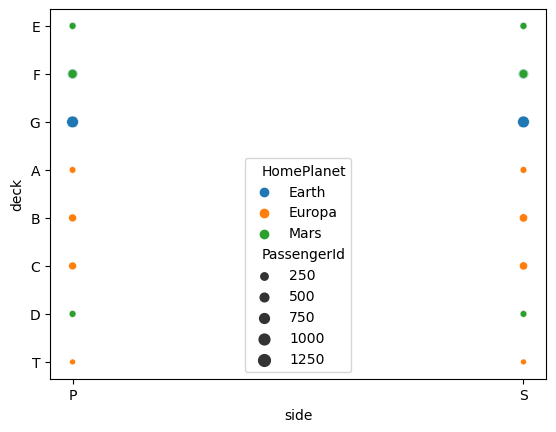

In [122]:
sns.scatterplot(data=grouped_home_planet, x='side',y='deck',hue='HomePlanet',size='PassengerId')

In [422]:
# Nulls and non-nulls match value counts for updated values
(train['HomePlanet']!=train['HomePlanet_2']).sum()

201

In [423]:
train.isna().sum()

PassengerId          0
HomePlanet         201
CryoSleep            0
Cabin              199
Destination        182
Age                179
VIP                203
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Name               200
Transported          0
passenger_group      0
num_group            0
total_spend          0
total_spend_max      0
num_group_max        0
surname            200
HomePlanet_2       111
dtype: int64

In [425]:
train.loc[train['HomePlanet_2'].isna()].groupby('num_group_max').count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passenger_group,num_group,total_spend,total_spend_max,surname,HomePlanet_2
num_group_max,,,,,,,,,,,,,,,,,,,,
1,109,0,109,105,106,109,106,109,109,109,109,109,104,109,109,109,109,109,104,0
2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0


## Cabin Exploration

In [ ]:
train[train['deck']=='A'].to_csv('deck_a_explore.csv')